In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading the data
To get started let's first load in the data! We will make use of the helper functions provided in `data_utils.py`

In [2]:
from data_utils import get_images, get_labels

The following is the list of disasters in our dataset. 

In [3]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]

We will load each disaster train dataset into a dictionary. Recall that each disaster consists of images and labels (0 - 3) of the damage level.

In [5]:
data = {}
split = "train"
with open('config.json') as config_file:
    config = json.load(config_file)
    data_dir = "satellite-image-data"

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {"images": images, "labels": labels}

Loading train images and labels for hurricane-matthew dataset...
Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...


Let's visualize an image and its label in the dataset. 

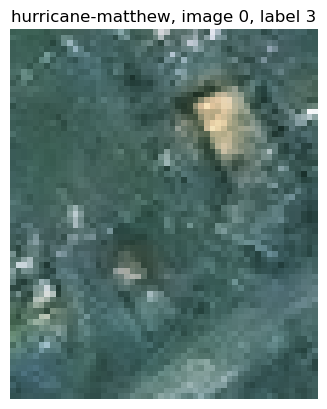

image shape: (65, 54, 3)


In [6]:
#disaster_list[0] = hurricane matthew
disaster = disaster_list[0]
#data is a nested dictionary
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# index of the image to display
idx = 0
img = images[idx]
label = labels[idx]

plt.title(f"{disaster}, image {idx}, label {label}")
plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()

#
print(f"image shape: {img.shape}")

# Extracting Color Information
Each image is an RGB image represented as a numpy array of dimensions (width, height, 3). The last dimension corresponds to the RGB *color channels* in the image. We can split the image by color channels and visualize each of them individually.

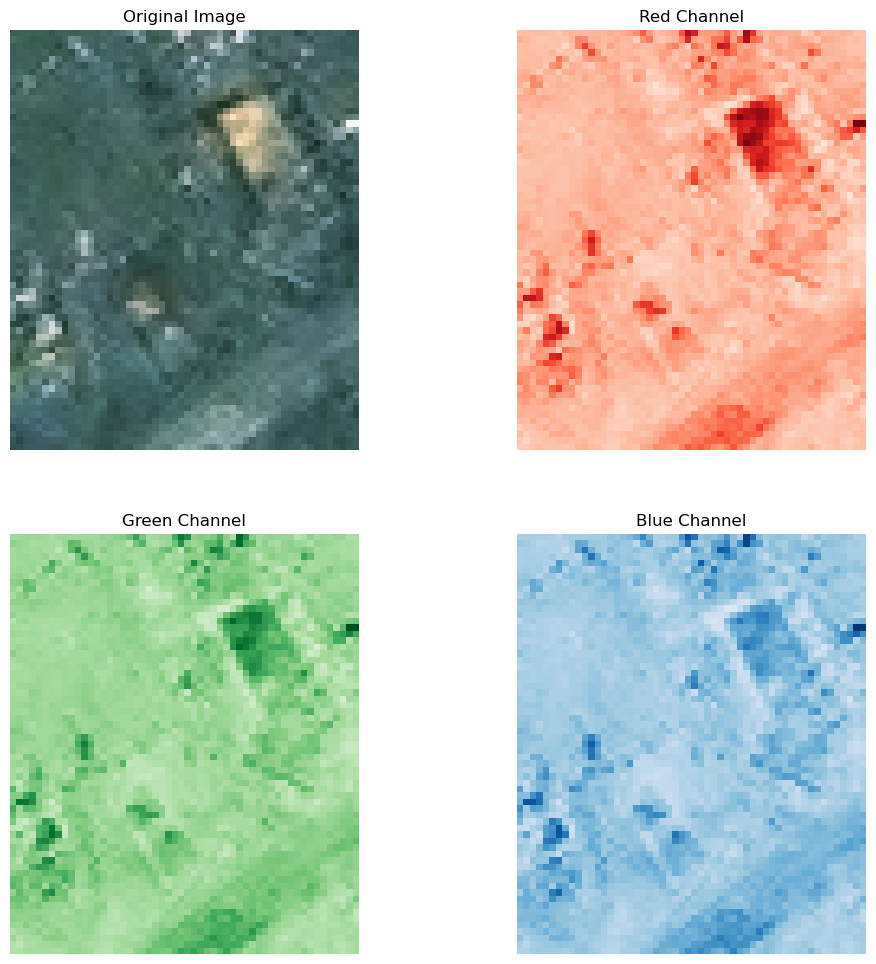

In [7]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 1], cmap="Greens", vmin=0, vmax=255)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img[:, :, 2], cmap="Blues", vmin=0, vmax=255)
plt.title("Blue Channel")
plt.axis("off")

plt.show()

We can zoom in on just a pixel as well.

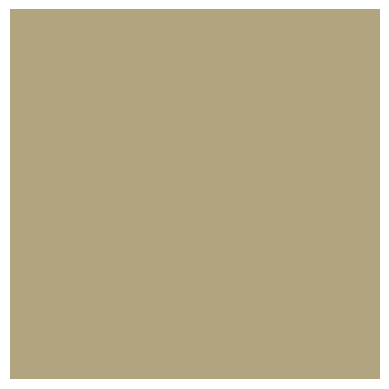

Pixel value: [177 165 128], coordinate: (15, 35)


In [8]:
coord = (15, 35)
pixel_value = img[coord[0], coord[1], :]
pixel_image = np.array([[pixel_value]])

plt.imshow(pixel_image)
plt.axis("off")
plt.show()

print(f"Pixel value: {pixel_value}, coordinate: {coord}")

# Extracting Edge and Texture Information

So far we have considered the **color** information in an image. However, other important aspects of an image are the edges and texture. 

Let us consider some popular feature processing methods for extracting edge and texture information. We will use the utilities provided in `feature_utils.py`.

In [9]:
from feature_utils import get_sobel_features, get_gabor_features, generate_gabor_kernel, get_local_binary_pattern

Let's try the Sobel Edge Filter. 

Read more about Sobel edge detection: https://en.wikipedia.org/wiki/Sobel_operator and https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html

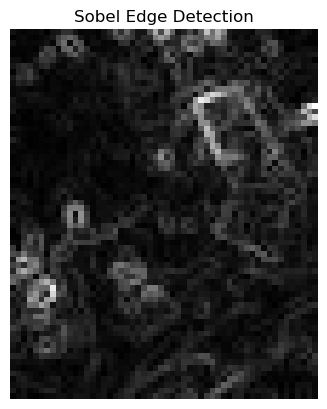

In [10]:
edges = get_sobel_features(img)
plt.imshow(edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

Now let's look at local binary patterns. 

Read more about LBP: https://en.wikipedia.org/wiki/Local_binary_patterns and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html

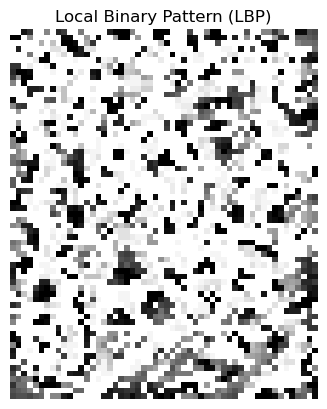

In [11]:
lbp = get_local_binary_pattern(img, radius=3)
plt.imshow(lbp, cmap="gray")
plt.axis("off")
plt.title("Local Binary Pattern (LBP)")
plt.show()

Another popular filter for image processing is the Gabor filter. The Gabor filters are a family of filters parametrized by orientation, frequency, bandwith, etc. Let's generate one such filter.

Read more about Gabor filters: https://en.wikipedia.org/wiki/Gabor_filter and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html

In [13]:
theta = 0
sigma = 1.0
frequency = 0.1

kernel = generate_gabor_kernel(theta, sigma, frequency)
gabor = get_gabor_features(img, kernel)

Let's visualize this filter (aka kernel) and the response of the image when we apply the filter. Concretely we are taking the convolution of the image with the filter. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for more details.

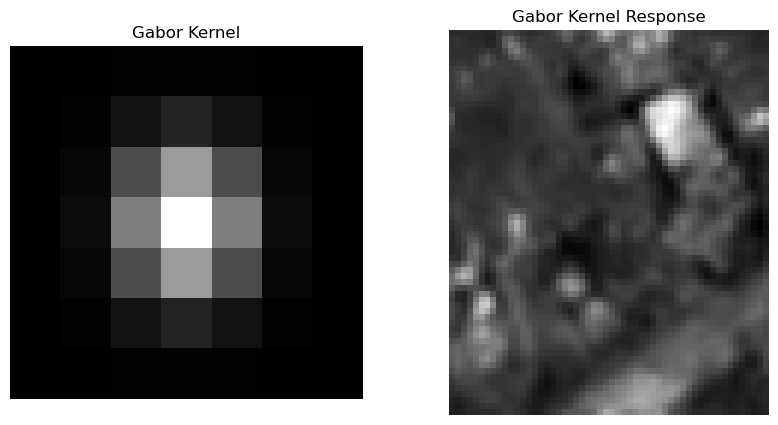

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot Gabor Kernel
axs[0].imshow(kernel, cmap="gray")
axs[0].axis("off")  # Remove axis
axs[0].set_title("Gabor Kernel")

# Plot Gabor Kernel Response
axs[1].imshow(gabor, cmap="gray")
axs[1].axis("off")  # Remove axis
axs[1].set_title("Gabor Kernel Response")

plt.show()

# Exploratory Data Analysis

The agency would like you to start performing some exploratory data analysis to build an initial understanding of the data. As part of the exploratory data analysis, the agency is interested in understanding certain aspects of the dataset better. 

Feel free to add more cells as you see fit for your analysis. 

# EDA - Basic Statistics

## Number of Images per Disaster Type


In [19]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]
num_images = []
images = data[disaster]["images"]


hurricane_num_images = len(data["hurricane-matthew"]["images"])
print(f"Number of images for Hurricane-matthew: {hurricane_num_images}")


socal_fire_num_images = len(data["socal-fire"]["images"])
print(f"Number of images for socal-fire: {socal_fire_num_images}")

midwest_flooding_num_images = len(data["midwest-flooding"]["images"])
print(f"Number of images for midwest-flooding: {midwest_flooding_num_images}")



Number of images for Hurricane-matthew: 11151
Number of images for socal-fire: 8380
Number of images for midwest-flooding: 7004


In [29]:
type(data["socal-fire"]["images"])
#print(data["socal-fire"]["images"][1][1])

image = data["socal-fire"]["images"][1]

height, width, colors = image.shape

print(height, width, colors)



48 51 3


## Distribution of Image Sizes in Each Dataset

## Hurricane matthew distribution of image sizes

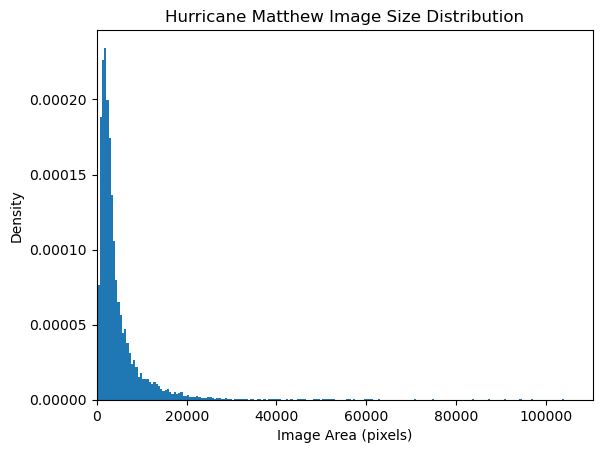

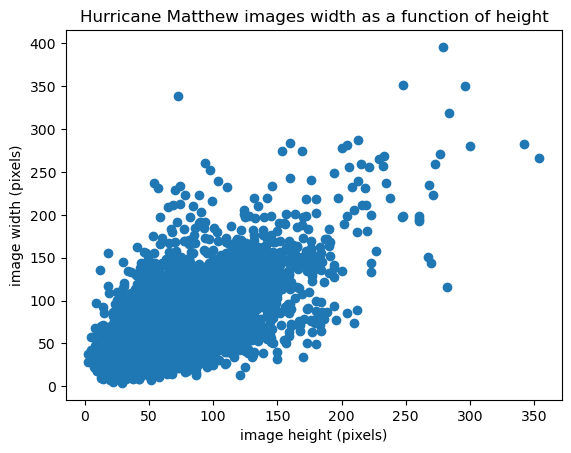

In [44]:
#find dimensions of images for hurricane matthew
matthew_heights = []
matthew_widths = []

#get width and height for all images in hurricane matthew
for i in range (11151):

    image = data["hurricane-matthew"]["images"][i]
    height, width, colors = image.shape
    matthew_heights.append(height)
    matthew_widths.append(width)
    
#convert lists to arrays 

matthew_heights_arr = np.array(matthew_heights)
matthew_widths_arr = np.array(matthew_widths)

#calculate area
matthew_areas = matthew_heights_arr * matthew_widths_arr

bins = np.arange(min(matthew_areas), max(matthew_areas), 250)
plt.figure()
plt.hist(matthew_areas, bins = bins, density = True)
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(matthew_areas))
plt.ylabel("Density")
plt.title("Hurricane Matthew Image Size Distribution")
plt.show()

plt.figure()
plt.scatter(matthew_heights, matthew_widths)
plt.title("Hurricane Matthew images width as a function of height")
plt.xlabel("image height (pixels)")
plt.ylabel("image width (pixels)")
plt.show()

## So-Cal fire distribution of image sizes

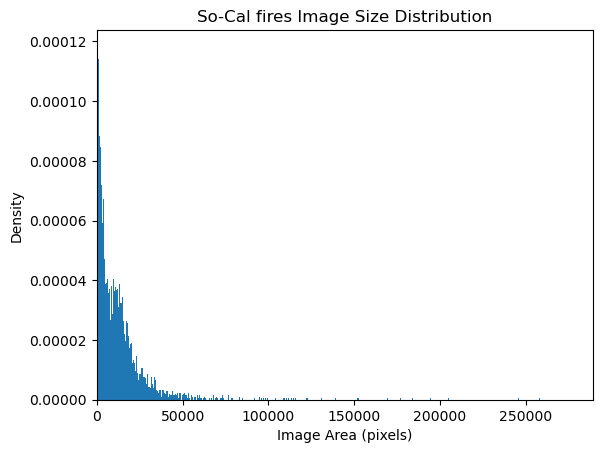

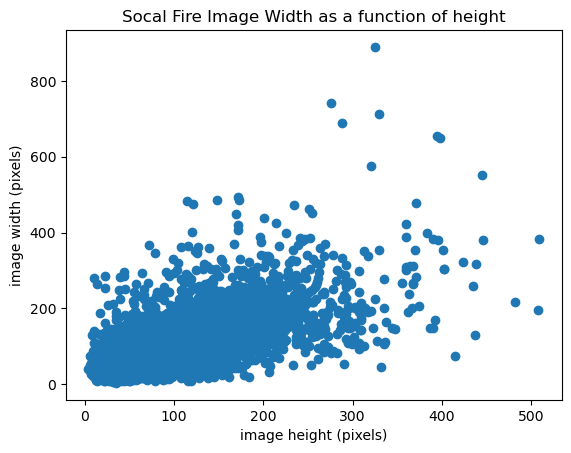

In [49]:
#find dimensions of images for socal-fire
socal_heights = []
socal_widths = []
for i in range (8380):

    image = data["socal-fire"]["images"][i]
    height, width, colors = image.shape
    socal_heights.append(height)
    socal_widths.append(width)

#convert lists to array
socal_heights_arr = np.array(socal_heights)
socal_widths_arr = np.array(socal_widths)

socal_areas = socal_heights_arr* socal_widths_arr
bins_socal = np.arange(min(socal_areas), max(socal_areas), 250)
plt.figure()
plt.hist(socal_areas, bins = bins_socal, density = True)
plt.xlim(0,max(socal_areas))
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(socal_areas))
plt.ylabel("Density")
plt.title("So-Cal fires Image Size Distribution")
plt.show()

plt.figure()
plt.scatter(socal_heights, socal_widths)
plt.title("Socal Fire Image Width as a function of height")
plt.xlabel("image height (pixels)")
plt.ylabel("image width (pixels)")
plt.show()

# Mid-west flooding distribution of image sizes

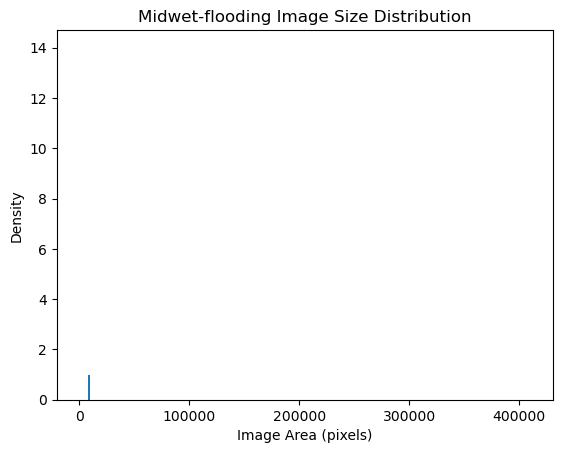

In [42]:
# find dimensions of images for mid-west flooding
flooding_heights = []
flooding_widths = []
for i in range (7004):

    image = data["midwest-flooding"]["images"][i]
    height, width, colors = image.shape
    flooding_heights.append(height)
    flooding_widths.append(width)

# calculate area    
flooding_areas = np.array(flooding_heights) * np.array(flooding_widths)

bins_flooding = np.arange(min(flooding_areas), max(flooding_areas), 250)
plt.figure()
plt.hist(flooding_areas, bins = bins_flooding, density = True)
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(flooding_areas))
plt.ylabel("Density")
plt.title("Midwest-flooding Image Size Distribution")
plt.show()


## Distribution of Damage Labels

## Distribution of Damage Labels Hurricane Matthew

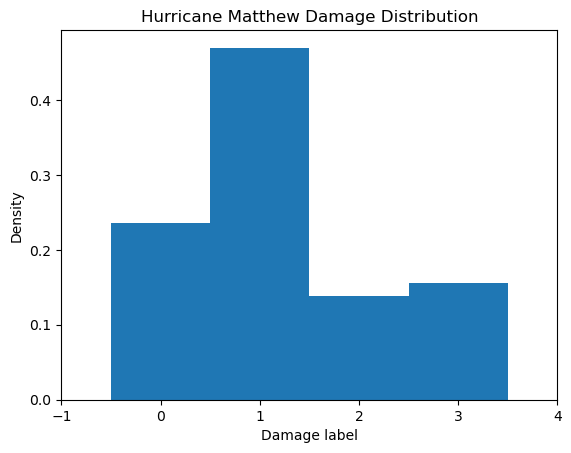

[3, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 3, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 2, 0, 1, 3, 0, 1, 1, 1, 0, 3, 3, 3, 1, 1, 0, 1, 1, 1, 2, 3, 2, 1, 1, 3, 1, 0, 0, 3, 1, 0, 1, 1, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 2, 3, 3, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 3, 1, 1, 0, 2, 3, 1, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 3, 0, 1, 0, 1, 2, 3, 1, 2, 3, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 3, 1, 2, 0, 1, 1, 1, 0, 1, 2, 3, 0, 1, 3, 0, 2, 2, 2, 1, 1, 0, 3, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 3, 1, 1, 0, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 

In [64]:
#find all labels for hurricane matthew

#list to store all labels
matthew_damage_labels = []

for i in range (11151):

    label = data["hurricane-matthew"]["labels"][i]
    matthew_damage_labels.append(label)

# calculate area    

bins = [-0.5, 0.5,1.5,2.5,3.5]

plt.figure()
plt.hist(matthew_damage_labels, bins = bins, density = True)
plt.xlabel("Damage label")
plt.xlim(0,max(matthew_damage_labels))
plt.ylabel("Density")
plt.xticks([-1,0, 1, 2, 3,4])
plt.title("Hurricane Matthew Damage Distribution")
plt.show()

print(matthew_damage_labels)

## Distribution of Damage Labels So-Cal Fire

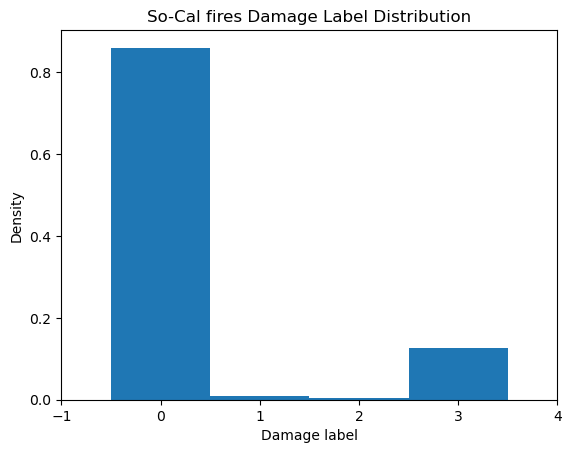

In [68]:
# Find labels for socal-fire
socal_labels = []
for i in range (8380):

    label = data["socal-fire"]["labels"][i]
    socal_labels.append(label)

socal_labels_bins = [-0.5,0.5,1.5,2.5,3.5]
plt.figure()
plt.hist(socal_labels, bins = socal_labels_bins, density = True)
plt.xlim(0,max(socal_labels))
plt.xticks([-1,0, 1, 2, 3,4])
plt.xlabel("Damage label")
plt.ylabel("Density")
plt.title("So-Cal fires Damage Label Distribution")
plt.show()

## Distribution of Damage Labels Midwest-flooding

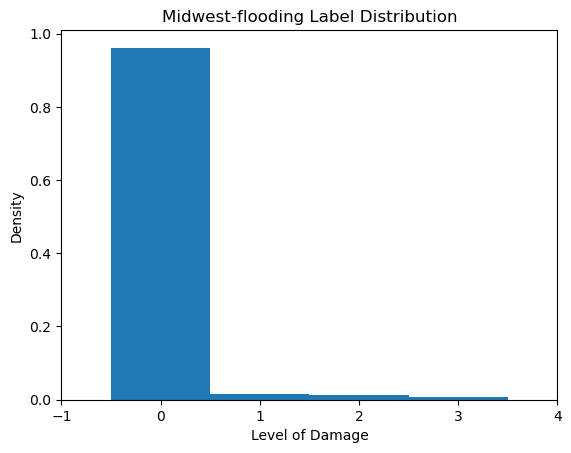

In [67]:
# find labels for midwest-flooding
flooding_labels = []
for i in range (7004):
    label = data["midwest-flooding"]["labels"][i]
    flooding_labels.append(label)

flooding_label_bins = [-0.5, 0.5,1.5,2.5,3.5]
plt.figure()
plt.hist(flooding_labels, bins = flooding_label_bins, density = True)
plt.xlabel("Level of Damage")
plt.xticks([-1,0, 1, 2, 3,4])
plt.ylabel("Density")
plt.title("Midwest-flooding Label Distribution")
plt.show()

# EDA - Useful Image Features for Classification

The agency is looking for insights into useful image features for classifying images based on disaster type or damage level. You are tasked with verifying this and exploring whether color, edge, or texture features can effectively differentiate:

1. `midwest-flooding` from `socal-fire` images.
2. Damage levels 1 and 3 within the `hurricane-matthew` dataset.

Previous interns have found color information to be potentially useful.

## Distribution of Color (RGB)

## How are the distributions "separable"?

The below are a non-exhaustive list of ways we can think about classifying these disaster images. You do not have to include all of them in your analysis.

### 1. `midwest-flooding` vs `socal-fire`

Among the different disaster events, are there are distinctions in:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?



### 2. Damage levels 1 vs 3 within the `hurricane-matthew` dataset

Is there a relationship between the damage level and:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?